In [1]:
import pandas as pd
import os

itc_csv_path = r"C:\Users\onkar\OneDrive\Documents\Data\StocksData\Kaggle_90_21_data\SCRIP\ITC.csv"
infy_csv_path = r"C:\Users\onkar\OneDrive\Documents\Data\StocksData\Kaggle_90_21_data\SCRIP\INFY.csv"

nifty_csv_path = r"C:\Users\onkar\OneDrive\Documents\Data\StocksData\Kaggle_90_21_data\INDEX\NIFTY_50.csv"
sensex_csv_path = r"C:\Users\onkar\OneDrive\Documents\Data\StocksData\Kaggle_90_21_data\INDEX\sensex.csv"

def read_csv(file_path):
    df = pd.read_csv(file_path,index_col=False)
    return df



## Data Visualization

In [2]:
itc_df = read_csv(itc_csv_path)
itc_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,ITC,EQ,249.75,249.75,252.00,249.00,NaN,251.25,250.45,21900,5.484855e+11,NaN,NaN,NaN
1,1996-01-02,ITC,EQ,251.25,246.00,250.50,238.00,NaN,241.75,241.85,166000,4.014747e+12,NaN,NaN,NaN
2,1996-01-03,ITC,EQ,241.75,231.00,236.45,229.55,NaN,234.00,234.09,336900,7.886630e+12,NaN,NaN,NaN
3,1996-01-04,ITC,EQ,234.00,234.00,239.95,231.50,NaN,238.40,234.62,275500,6.463839e+12,NaN,NaN,NaN
4,1996-01-05,ITC,EQ,238.40,238.40,237.50,233.50,NaN,234.10,235.36,111300,2.619566e+12,NaN,NaN,NaN


In [3]:
infy_df = read_csv(infy_csv_path)
infy_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,INFOSYSTCH,EQ,408.00,407.0,407.9,405.00,NaN,407.90,406.48,400,1.625900e+10,NaN,NaN,NaN
1,1996-01-02,INFOSYSTCH,EQ,407.90,407.0,409.0,406.25,NaN,406.25,407.58,400,1.630300e+10,NaN,NaN,NaN
2,1996-01-03,INFOSYSTCH,EQ,406.25,409.0,409.0,409.00,NaN,409.00,409.00,200,8.180000e+09,NaN,NaN,NaN
3,1996-01-04,INFOSYSTCH,EQ,409.00,405.0,407.0,405.00,NaN,406.30,405.65,600,2.433900e+10,NaN,NaN,NaN
4,1996-01-05,INFOSYSTCH,EQ,406.30,401.5,401.5,401.50,NaN,401.50,401.50,100,4.015000e+09,NaN,NaN,NaN


In [4]:
nifty_df = read_csv(nifty_csv_path)
nifty_df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
7505,2021-06-25,15839.35,15870.80,15772.30,15860.35,314614380.0,2.693322e+11
7506,2021-06-28,15915.35,15915.65,15792.15,15814.70,255099272.0,1.871341e+11
7507,2021-06-29,15807.50,15835.90,15724.05,15748.45,360334724.0,2.439213e+11
7508,2021-06-30,15776.90,15839.10,15708.75,15721.50,262386323.0,2.037976e+11
7509,2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644.0,1.735997e+11


In [5]:
sensex_df = read_csv(sensex_csv_path)
sensex_df.head()

,Date,Open,High,Low,Close
0,1-January-1997,3096.65,3270.04,3096.65,3260.56
1,2-January-1997,3261.94,3275.36,3219.16,3225.24
2,3-January-1997,3215.46,3264.00,3204.88,3264.00
3,6-January-1997,3267.75,3287.47,3238.08,3252.31
4,7-January-1997,3250.51,3273.43,3222.19,3264.12


In [6]:
def get_year_month(df):
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    return df


In [7]:
itc_df = get_year_month(itc_df)
infy_df = get_year_month(infy_df)
nifty_df = get_year_month(nifty_df)
sensex_df = get_year_month(sensex_df)

df_list = [itc_df,infy_df,nifty_df,sensex_df]
series_names = ['ITC','Infosys','NIFTY50','SENSEX']

In [8]:
infy_df['year'].head()

0    1996
1    1996
2    1996
3    1996
4    1996
Name: year, dtype: int32

## Time Series Analysis

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot


Matplotlib is building the font cache; this may take a moment.


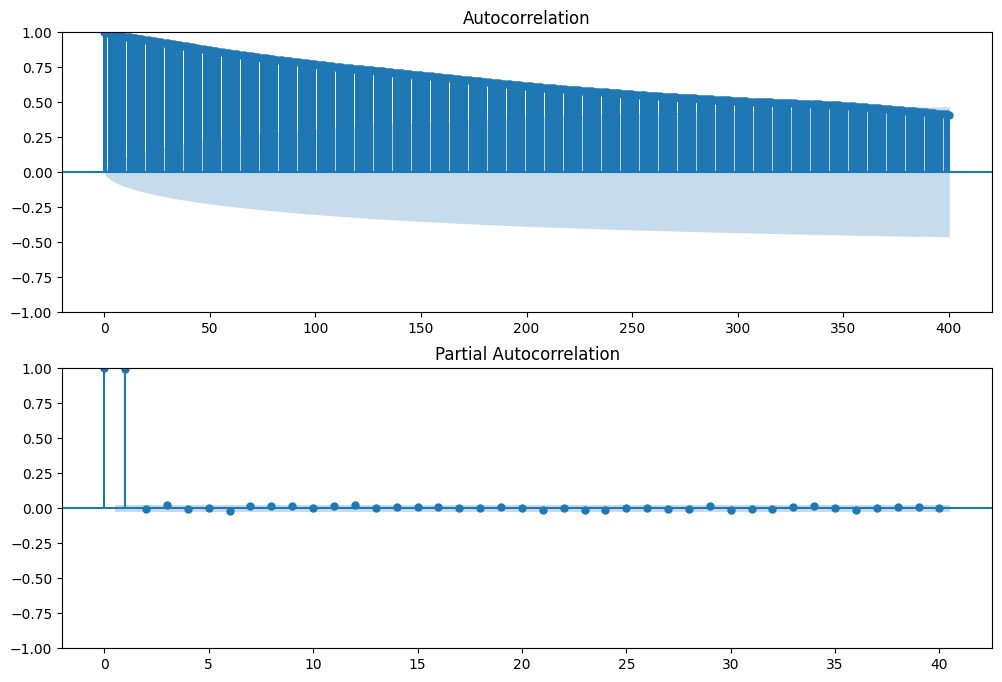

In [10]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(itc_df['Close'].values.squeeze(), lags=400, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(itc_df['Close'], lags=40, ax=ax2)


In [11]:
mod = sm.tsa.arima.ARIMA(itc_df['Close'], order=(1, 0, 0))
res = mod.fit()
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6350
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -29575.381
Date:                Sun, 28 Jan 2024   AIC                          59156.762
Time:                        11:37:38   BIC                          59177.031
Sample:                             0   HQIC                         59163.781
                               - 6350                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        445.2924    287.225      1.550      0.121    -117.658    1008.243
ar.L1          0.9969      0.002    536.028      0.000       0.993       1.001
sigma2       649.6960      1.625    399.782      0.0

In [12]:
mod = sm.tsa.arima.ARIMA(itc_df['Close'], order=(13, 1, 5))
res = mod.fit()
print(res.summary())

C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6350
Model:                ARIMA(13, 1, 5)   Log Likelihood              -29560.749
Date:                Sun, 28 Jan 2024   AIC                          59159.499
Time:                        11:38:06   BIC                          59287.864
Sample:                             0   HQIC                         59203.949
                               - 6350                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1717      1.336      0.129      0.898      -2.447       2.791
ar.L2          0.1024      1.422      0.072      0.943      -2.685       2.890
ar.L3          0.3324      0.950      0.350      0.7

In [13]:
itc_df['Close_pred'] = res.predict()

In [15]:
df = itc_df[itc_df['year']>=2021]
len(df)

123

In [18]:
import numpy as np
mse = np.sqrt(np.sum((df['Close'] - df['Close_pred'])**2)/len(df)) 
print(mse)

3.362727674820808


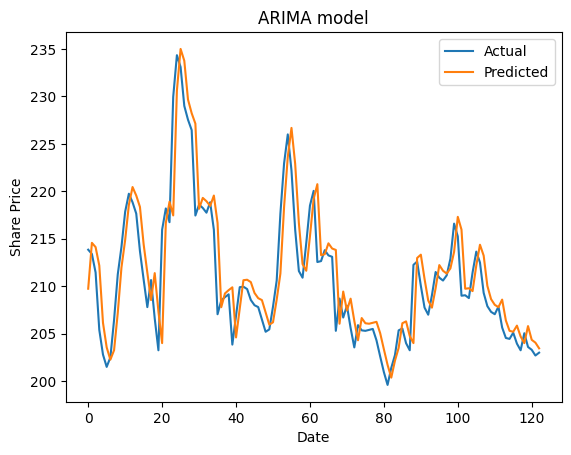

In [85]:
df = itc_df[itc_df['year']>=2021]

x_axis = list(range(len(df['Date'])))
# x_axis = df['Date']

# Plotting two columns on the same figure
plt.plot(x_axis, df['Close'], label='Actual')
plt.plot(x_axis, df['Close_pred'], label='Predicted')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.title('ARIMA model')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [10]:
def get_predictions(df,arima_model_name='arima'):
    if arima_model_name == 'ma':
        mod = sm.tsa.arima.ARIMA(df['Close'], order=(0, 0, 5))
    elif arima_model_name == 'ar':
        mod = sm.tsa.arima.ARIMA(df['Close'], order=(13, 0, 0))
    elif arima_model_name == 'arma':
        mod = sm.tsa.arima.ARIMA(df['Close'], order=(13, 0, 5))
    elif arima_model_name == 'arima':
        mod = sm.tsa.arima.ARIMA(df['Close'], order=(13, 1, 5))
    else:
        raise NotImplementedError 
        
    res = mod.fit()
    
    pred_col_name = f'{arima_model_name}_Close_pred'
    df[pred_col_name] = res.predict()
    
    _df = df[df['year']>=2021]
    mse = round(np.sqrt(np.sum((_df['Close'] - _df[pred_col_name])**2)/len(_df)),2) 
    print(f"Model: {arima_model_name}, rmse: {mse}")
    return df,mse


models = ['ma','ar','arma','arima']
mse_list = []
for i,df in enumerate(df_list):
    _mse = []
    print(4*"***")
    print(f"Time series of {series_names[i]}")
    for m in models:
        df,_rmse = get_predictions(df,m)
        _mse.append(_rmse)
    df_list[i] = df
    mse_list.append(_mse)
    
    
        

************
Time series of ITC


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model: ma, rmse: 75.36
Model: ar, rmse: 3.44


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: arma, rmse: 3.44


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: arima, rmse: 3.36
************
Time series of Infosys


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: ma, rmse: 661.65
Model: ar, rmse: 18.78


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: arma, rmse: 18.77


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: arima, rmse: 19.1
************
Time series of NIFTY50


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: ma, rmse: 862.55


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: ar, rmse: 175.99


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: arma, rmse: 163.82


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: arima, rmse: 164.7
************
Time series of SENSEX


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: ma, rmse: 13373.52


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: ar, rmse: 562.87


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model: arma, rmse: 524.51


C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\onkar\anaconda3\envs\technical_analysis\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model: arima, rmse: 524.92


In [11]:
mse_list

[[75.36, 3.44, 3.44, 3.36],
 [661.65, 18.78, 18.77, 19.1],
 [862.55, 175.99, 163.82, 164.7],
 [13373.52, 562.87, 524.51, 524.92]]

In [23]:
round(13373.519339425739,2)

13373.52

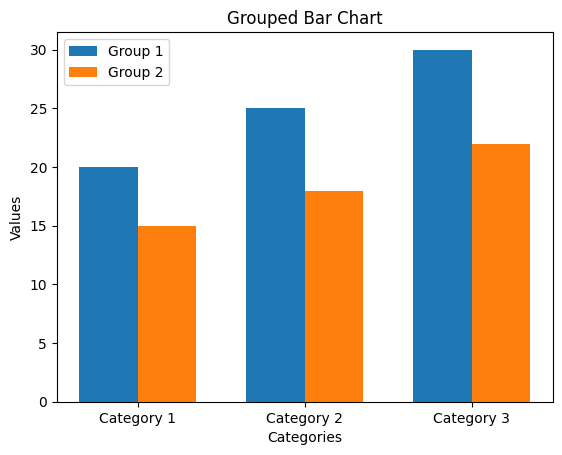

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
group1_values = [20, 25, 30]
group2_values = [15, 18, 22]

# Setting the bar width
bar_width = 0.35

# Creating the bar positions for each category
bar_positions_group1 = np.arange(len(categories))
bar_positions_group2 = bar_positions_group1 + bar_width

# Plotting the grouped bar chart
plt.bar(bar_positions_group1, group1_values, width=bar_width, label='Group 1')
plt.bar(bar_positions_group2, group2_values, width=bar_width, label='Group 2')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Chart')
plt.xticks(bar_positions_group1 + bar_width / 2, categories)  # Set x-axis ticks at the center of each group

# Adding legend
plt.legend()

# Display the plot
plt.show()


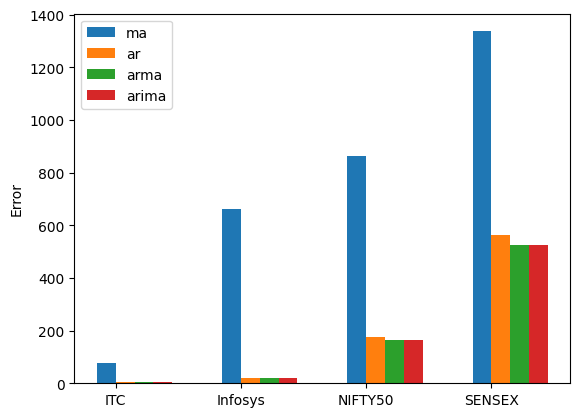

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']

group1_values = [20, 25, 30]
group2_values = [15, 18, 22]

# Setting the bar width
bar_width = 0.15

# Creating the bar positions for each category
ma = np.arange(len(models))
ar = ma + bar_width
arma = ar + bar_width
arima = arma + bar_width

# Plotting the grouped bar chart
plt.bar(ma, np.array(mse_list)[:,0], width=bar_width, label=models[0])
plt.bar(ar, np.array(mse_list)[:,1], width=bar_width, label=models[1])
plt.bar(arma, np.array(mse_list)[:,2], width=bar_width, label=models[2])
plt.bar(arima, np.array(mse_list)[:,3], width=bar_width, label=models[3])

# Adding labels and title
# plt.xlabel('RMSE')
plt.ylabel('Error')
# plt.title('RMSE')
plt.xticks(bar_positions_group1 + bar_width / 2, series_names)  # Set x-axis ticks at the center of each group

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [46]:
mse_list

[[75.36, 3.44, 3.44, 3.36],
 [661.65, 18.78, 18.77, 19.1],
 [862.55, 175.99, 163.82, 164.7],
 [13373.52, 562.87, 524.51, 524.92]]

In [36]:
mse_list[:,0]

TypeError: list indices must be integers or slices, not tuple

In [49]:
np.array(mse_list)[0:2,3]

array([ 3.36, 19.1 ])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (2,).

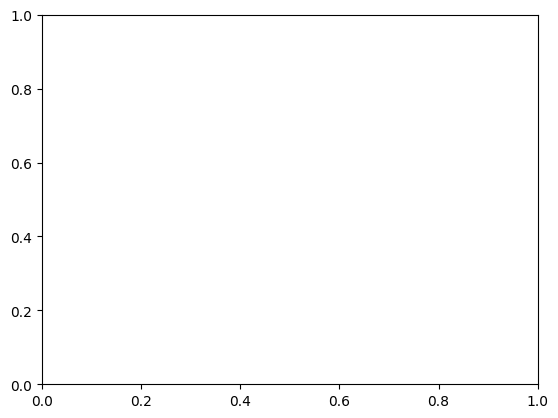

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the bar width
bar_width = 0.15

# Creating the bar positions for each category
ma = np.arange(len(models))
ar = ma + bar_width
arma = ar + bar_width
arima = arma + bar_width

# Plotting the grouped bar chart
plt.bar(ma, np.array(mse_list)[0:2,0], width=bar_width, label=models[0])
plt.bar(ar, np.array(mse_list)[0:2,1], width=bar_width, label=models[1])
plt.bar(arma, np.array(mse_list)[0:2,2], width=bar_width, label=models[2])
plt.bar(arima, np.array(mse_list)[0:2,3], width=bar_width, label=models[3])

# Adding labels and title
# plt.xlabel('RMSE')
plt.ylabel('Error')
# plt.title('RMSE')
plt.xticks(bar_positions_group1 + bar_width / 2, series_names[0:2])  # Set x-axis ticks at the center of each group

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the bar width
bar_width = 0.15

# Creating the bar positions for each category
ma = np.arange(len(models))
ar = ma + bar_width
arma = ar + bar_width
arima = arma + bar_width

# Plotting the grouped bar chart
plt.bar(ma, np.array(mse_list)[:,0], width=bar_width, label=models[0])
plt.bar(ar, np.array(mse_list)[:,1], width=bar_width, label=models[1])
plt.bar(arma, np.array(mse_list)[:,2], width=bar_width, label=models[2])
plt.bar(arima, np.array(mse_list)[:,3], width=bar_width, label=models[3])

# Adding labels and title
# plt.xlabel('RMSE')
plt.ylabel('Error')
# plt.title('RMSE')
plt.xticks(bar_positions_group1 + bar_width / 2, series_names)  # Set x-axis ticks at the center of each group

# Adding legend
plt.legend()

# Display the plot
plt.show()

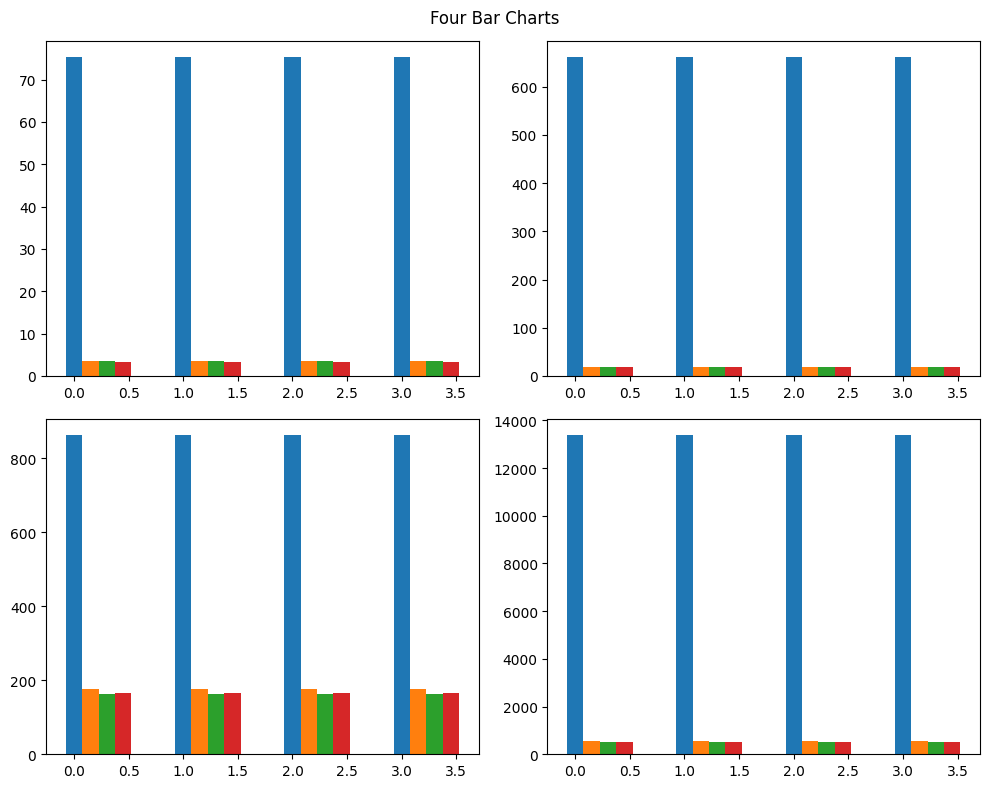

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Setting the bar width
bar_width = 0.15

# Creating the bar positions for each category
ma = np.arange(len(models))
ar = ma + bar_width
arma = ar + bar_width
arima = arma + bar_width

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plotting the grouped bar chart
k=0 
for i in range(2):
    for j in range(2):
        axes[i, j].bar(ma, np.array(mse_list)[k,0], width=bar_width, label=models[0])
        axes[i, j].bar(ar, np.array(mse_list)[k,1], width=bar_width, label=models[1])
        axes[i, j].bar(arma, np.array(mse_list)[k,2], width=bar_width, label=models[2])
        axes[i, j].bar(arima, np.array(mse_list)[k,3], width=bar_width, label=models[3])
        k+=1

# Adding labels and title
# plt.xlabel('RMSE')
# plt.ylabel('Error')
# # plt.title('RMSE')
# plt.xticks(bar_positions_group1 + bar_width / 2, series_names)  # Set x-axis ticks at the center of each group

# # Adding legend
# plt.legend()

fig.suptitle('Four Bar Charts')

# Adjust layout to prevent clipping of titles
fig.tight_layout()

# Display the plot
plt.show()


# Display the plot
# plt.show()

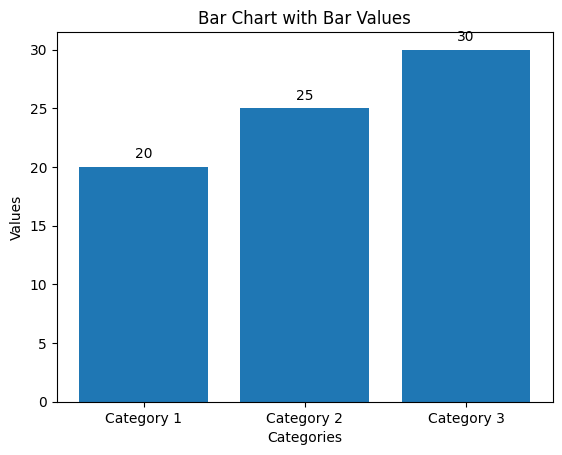

In [13]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
values = [20, 25, 30]

# Creating a bar chart
plt.bar(categories, values)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart with Bar Values')

# Annotating each bar with its value
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

# Display the plot
plt.show()


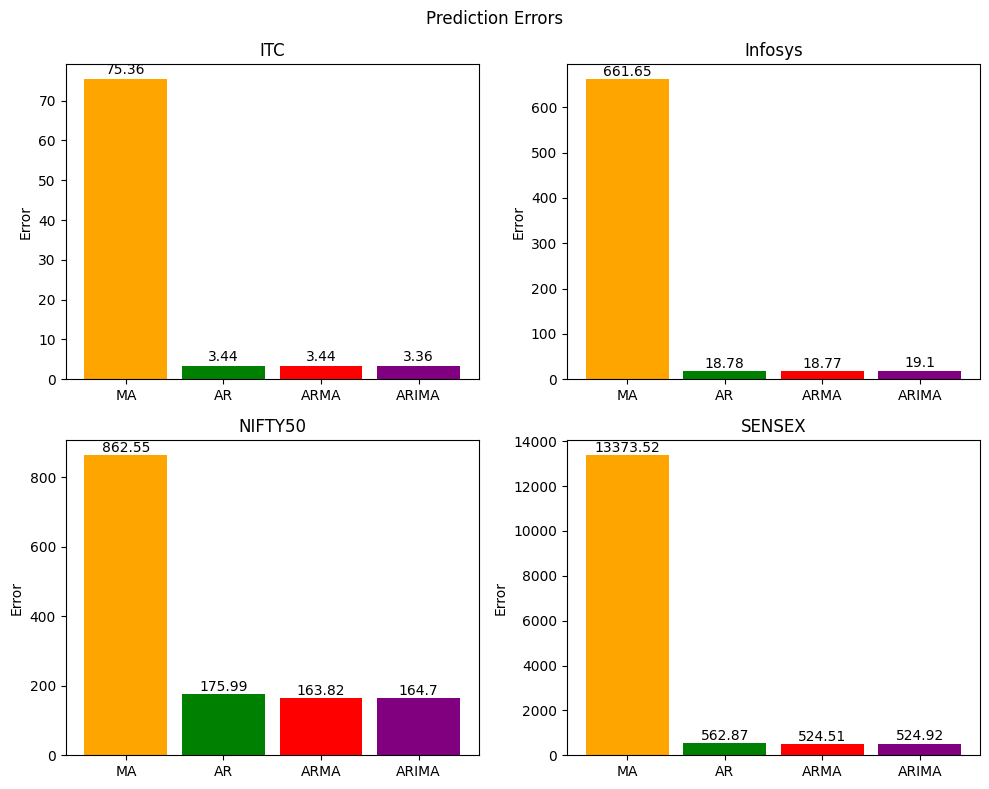

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for four groups and categories
categories = ['Category 1', 'Category 2', 'Category 3']
group1_values = [20, 25, 30]
group2_values = [15, 18, 22]
group3_values = [10, 12, 15]
group4_values = [28, 22, 18]

# Setting the bar width
bar_width = 0.85

# c = ['red', 'yellow', 'blue', 'green']
c = ['orange', 'green','red','purple']

# Creating the bar positions for each category
# bar_positions = np.arange(len(models))
bar_positions = models
bar_positions = ['MA','AR','ARMA','ARIMA']

# Creating a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plotting the first bar chart in the top-left subplot
axes[0, 0].bar(bar_positions, mse_list[0], width=bar_width, label='Group 1',color=c)
axes[0, 0].set_title(series_names[0])
axes[0, 0].set_ylabel('Error')

for i, value in enumerate(mse_list[0]):
    axes[0, 0].text(i, value + 0.5, str(value), ha='center', va='bottom')

# Plotting the second bar chart in the top-right subplot
axes[0, 1].bar(bar_positions, mse_list[1], width=bar_width, label='Group 2', color=c)
axes[0, 1].set_title(series_names[1])
axes[0, 1].set_ylabel('Error')

for i, value in enumerate(mse_list[1]):
    axes[0, 1].text(i, value + 0.5, str(value), ha='center', va='bottom')

# Plotting the third bar chart in the bottom-left subplot
axes[1, 0].bar(bar_positions, mse_list[2], width=bar_width, label='Group 3', color=c)
axes[1, 0].set_title(series_names[2])
axes[1, 0].set_ylabel('Error')

for i, value in enumerate(mse_list[2]):
    axes[1, 0].text(i, value + 0.5, str(value), ha='center', va='bottom')

# Plotting the fourth bar chart in the bottom-right subplot
axes[1, 1].bar(bar_positions, mse_list[3], width=bar_width, label='Group 4', color=c)
axes[1, 1].set_title(series_names[3])
axes[1, 1].set_ylabel('Error')

for i, value in enumerate(mse_list[3]):
    axes[1, 1].text(i, value + 0.5, str(value), ha='center', va='bottom')

# Adding labels and title for the entire figure
fig.suptitle('Prediction Errors')

# Adjust layout to prevent clipping of titles
fig.tight_layout()

plt.savefig(r'C:\Users\onkar\OneDrive\Documents\MMaths\Sem3\TermPaper\pred_err.png')
# Display the plot
plt.show()


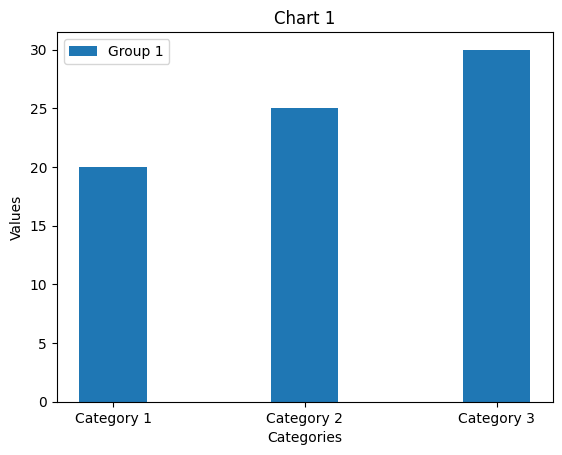

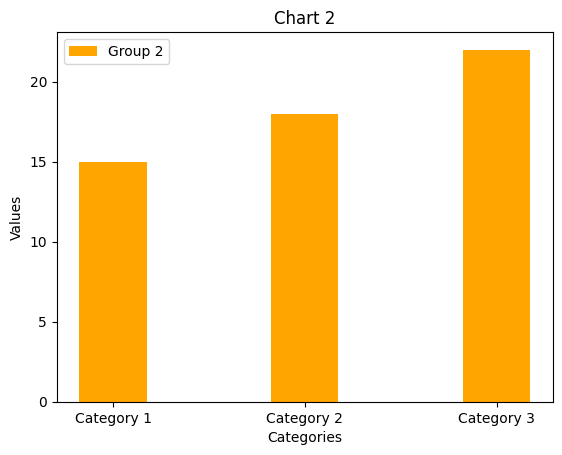

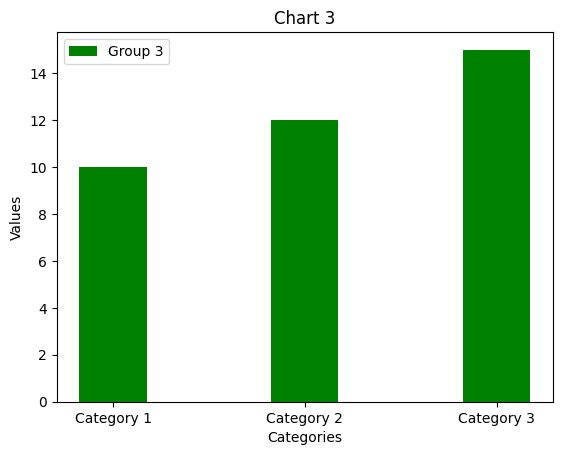

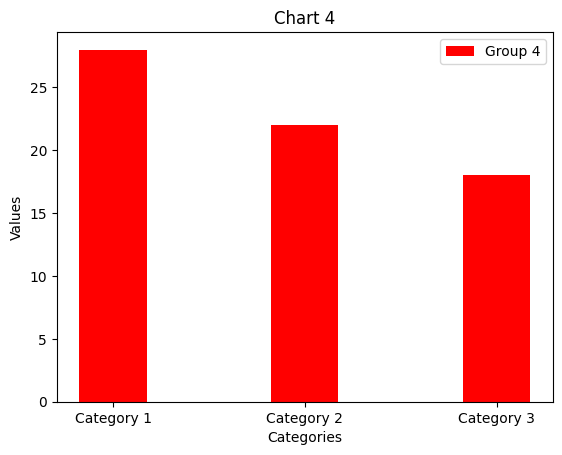

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for four groups and categories
categories = ['Category 1', 'Category 2', 'Category 3']
group1_values = [20, 25, 30]
group2_values = [15, 18, 22]
group3_values = [10, 12, 15]
group4_values = [28, 22, 18]

# Setting the bar width
bar_width = 0.35

# Creating the bar positions for each category
bar_positions = np.arange(len(categories))

# Plotting the first bar chart with legend in the first figure
plt.figure(1)
plt.bar(bar_positions, group1_values, width=bar_width, label='Group 1')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Chart 1')
plt.xticks(bar_positions, categories)
plt.legend()

# Plotting the second bar chart with legend in the second figure
plt.figure(2)
plt.bar(bar_positions, group2_values, width=bar_width, label='Group 2', color='orange')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Chart 2')
plt.xticks(bar_positions, categories)
plt.legend()

# Plotting the third bar chart with legend in the third figure
plt.figure(3)
plt.bar(bar_positions, group3_values, width=bar_width, label='Group 3', color='green')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Chart 3')
plt.xticks(bar_positions, categories)
plt.legend()

# Plotting the fourth bar chart with legend in the fourth figure
plt.figure(4)
plt.bar(bar_positions, group4_values, width=bar_width, label='Group 4', color='red')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Chart 4')
plt.xticks(bar_positions, categories)
plt.legend()

# Display the plots
plt.show()


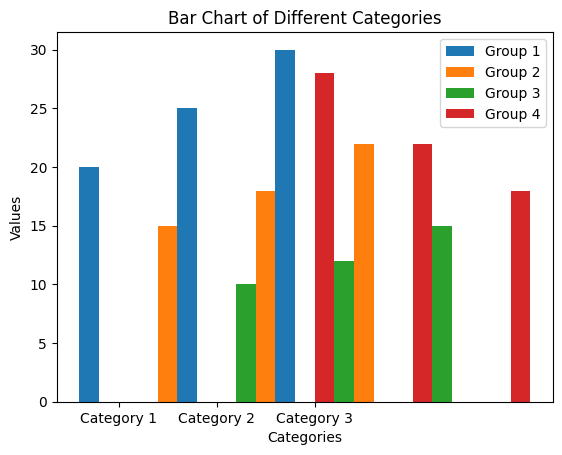

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for four groups and categories
groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
categories = ['Category 1', 'Category 2', 'Category 3']
values = np.array([
    [20, 25, 30],
    [15, 18, 22],
    [10, 12, 15],
    [28, 22, 18]
])

# Setting the bar width
bar_width = 0.2

# Creating the bar positions for each category and group
bar_positions = np.arange(len(categories))
group_offsets = np.arange(len(groups)) * bar_width * (len(categories) + 1)

# Plotting the bar chart
for i, group in enumerate(groups):
    plt.bar(bar_positions + group_offsets[i], values[i, :], width=bar_width, label=group)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Different Categories')
plt.xticks(bar_positions + (len(groups) - 1) * bar_width / 2, categories)

# Adding legend
plt.legend()

# Display the plot
plt.show()


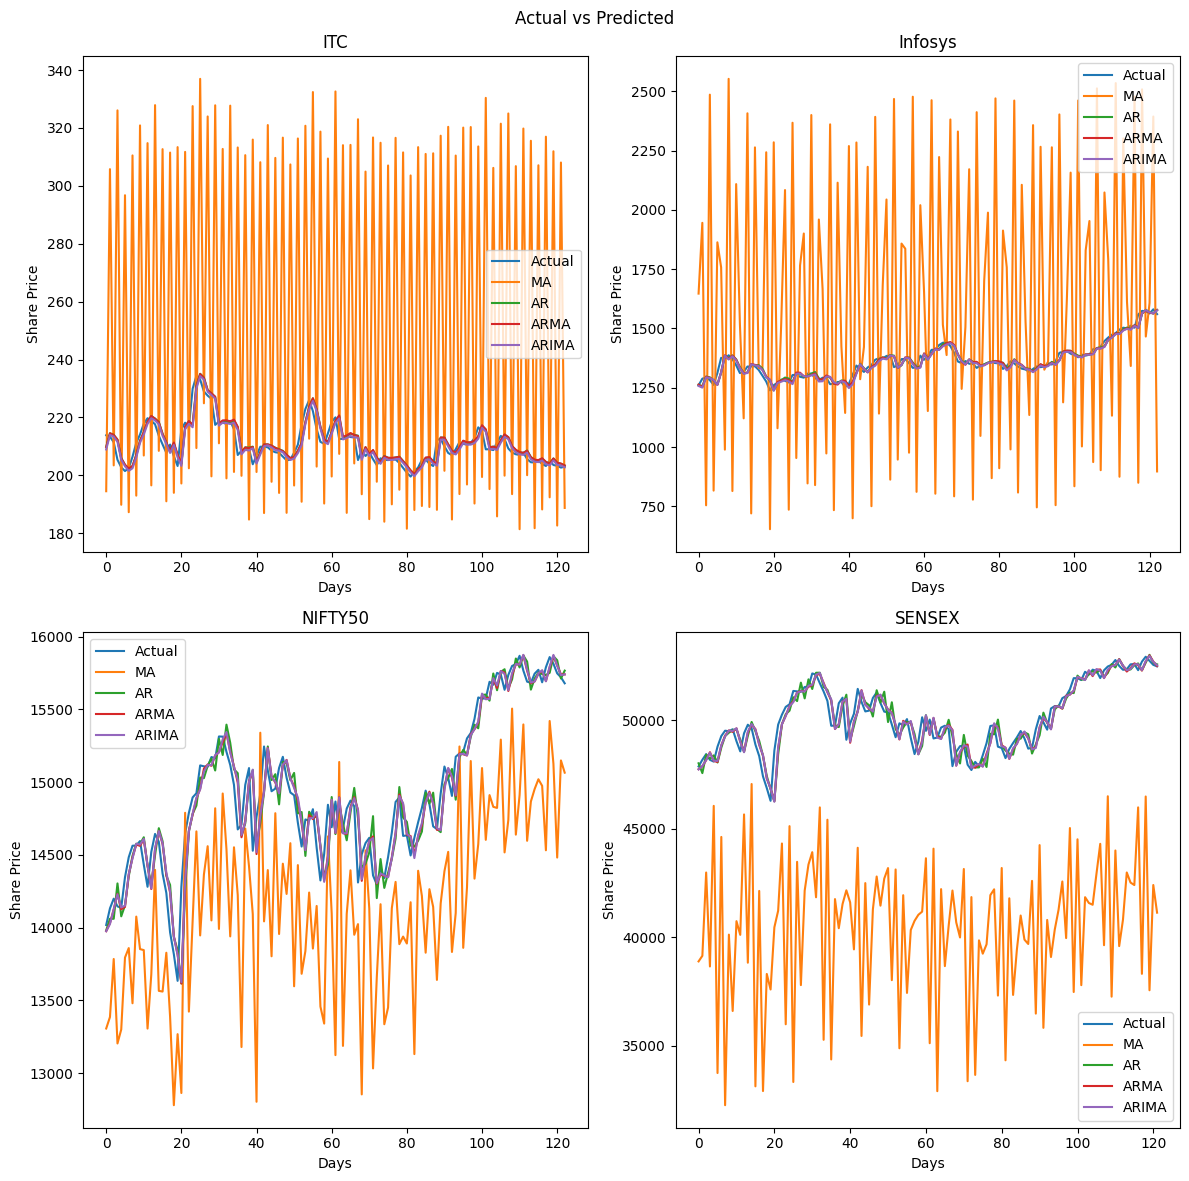

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

def generate_graph(fig_ax,df):
    _df = df[df['year']>=2021]
    if np.any(_df['year']>2021):
        _df = _df[_df['year']<2022] 
        _df = _df[_df['month']<7]

    x_axis = list(range(len(_df['Date'])))
    # x_axis = df['Date']
    
    model_lgends = ['MA','AR','ARMA','ARIMA']
    fig_ax.plot(x_axis, _df['Close'], label='Actual')
    for ind,arima_model_name in enumerate(models):
        fig_ax.plot(x_axis, _df[f'{arima_model_name}_Close_pred'], label=model_lgends[ind])
    

# # Adding labels and title
# plt.xlabel('Date')
# plt.ylabel('Share Price')
# plt.title('ARIMA model')

# # Adding legend
# plt.legend()
    

# Plotting multiple line plots on the grid
for i, ax in enumerate(axes):
    if i == 0:
        generate_graph(ax,itc_df)
    elif i == 1:
        generate_graph(ax,infy_df)
    elif i == 2:
        generate_graph(ax,nifty_df)
    elif i == 3:
        generate_graph(ax,sensex_df)

    # Adding labels and title to each subplot
    ax.set_xlabel('Days')
    ax.set_ylabel('Share Price')
    ax.set_title(f'{series_names[i]}')
    ax.legend()

# axes[0].legend()
fig.suptitle('Actual vs Predicted')
# Adjust layout to prevent clipping of titles
fig.tight_layout()

plt.savefig(r'C:\Users\onkar\OneDrive\Documents\MMaths\Sem3\TermPaper\act_pred.png')
# Display the plots
plt.show()



In [29]:
c = ['orange', 'green','red','purple']

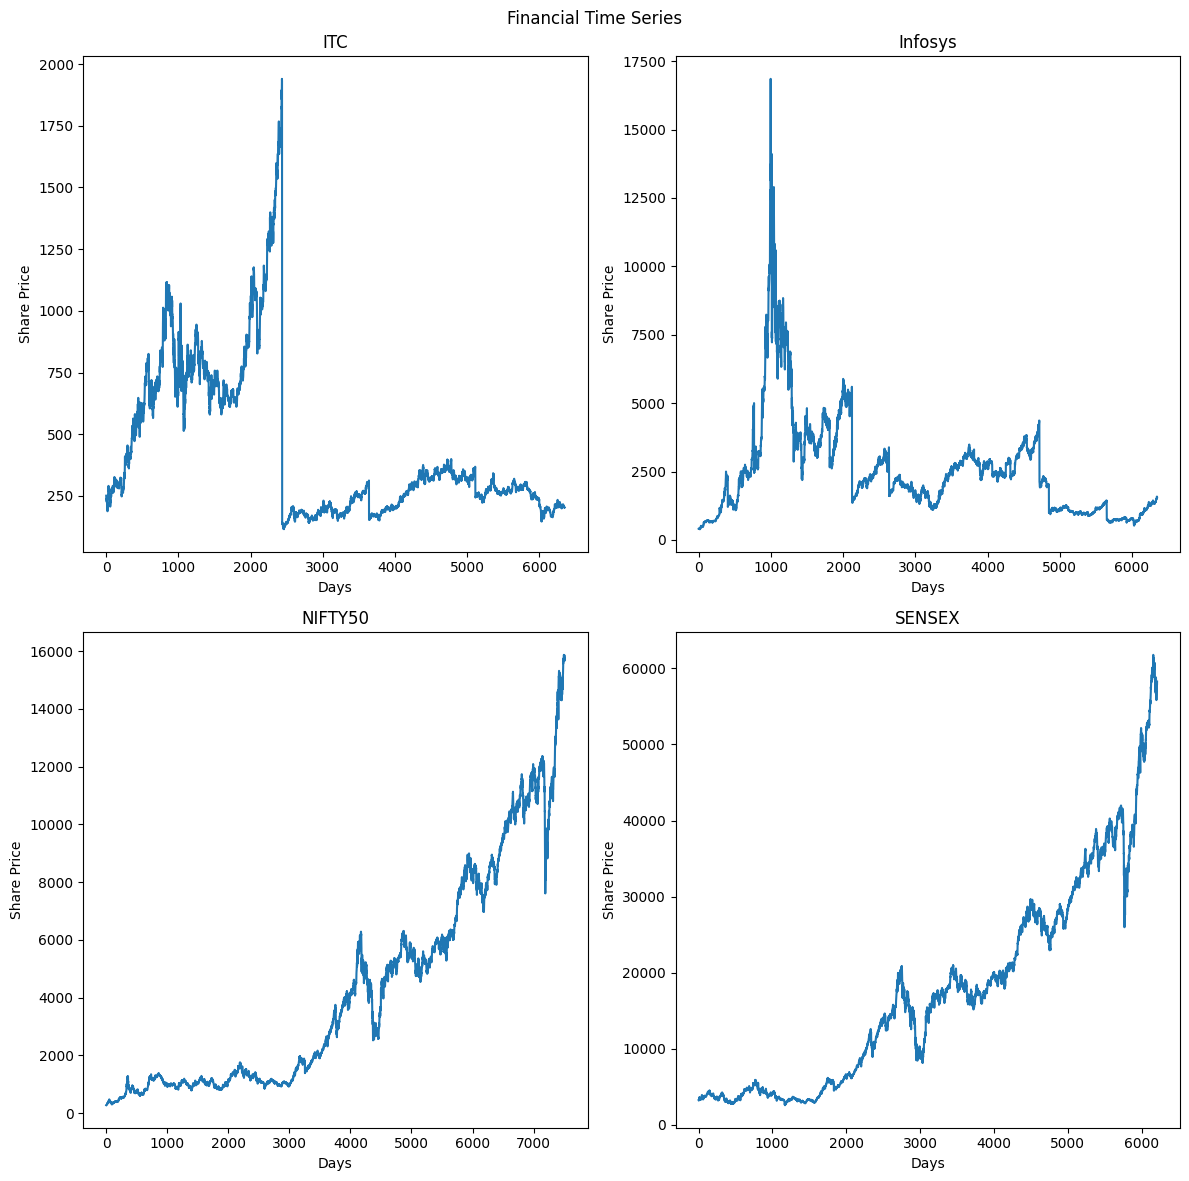

In [43]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

def generate_graph(fig_ax,df):
    _df = df[df['year']<=2021]
    if np.any(_df['year']>2021):
        _df = _df[_df['year']<2022] 
        _df = _df[_df['month']<7]

    x_axis = list(range(len(_df['Date'])))
    # x_axis = df['Date']
    
    # model_lgends = ['MA','AR','ARMA','ARIMA']
    fig_ax.plot(x_axis, _df['Close'], label='Actual')
    # for ind,arima_model_name in enumerate(models):
        # fig_ax.plot(x_axis, _df[f'{arima_model_name}_Close_pred'], label=model_lgends[ind])
    

# # Adding labels and title
# plt.xlabel('Date')
# plt.ylabel('Share Price')
# plt.title('ARIMA model')

# # Adding legend
# plt.legend()
    

# Plotting multiple line plots on the grid
for i, ax in enumerate(axes):
    if i == 0:
        generate_graph(ax,itc_df)
    elif i == 1:
        generate_graph(ax,infy_df)
    elif i == 2:
        generate_graph(ax,nifty_df)
    elif i == 3:
        generate_graph(ax,sensex_df)

    # Adding labels and title to each subplot
    ax.set_xlabel('Days')
    ax.set_ylabel('Share Price')
    ax.set_title(f'{series_names[i]}')
    # ax.legend()

# axes[0].legend()
fig.suptitle('Financial Time Series')
# Adjust layout to prevent clipping of titles
fig.tight_layout()

plt.savefig(r'C:\Users\onkar\OneDrive\Documents\MMaths\Sem3\TermPaper\share_prices.png')
# Display the plots
plt.show()

